In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score


## Read Data

In [20]:
data_name = "transformed_business"
# data_name = "dummy_object"
df = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,25,235,1,neutral or dissatisfied
1,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,26,1142,0,satisfied
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,25,562,11,neutral or dissatisfied
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,61,214,0,satisfied
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,52,2035,4,satisfied


<Axes: xlabel='satisfaction', ylabel='count'>

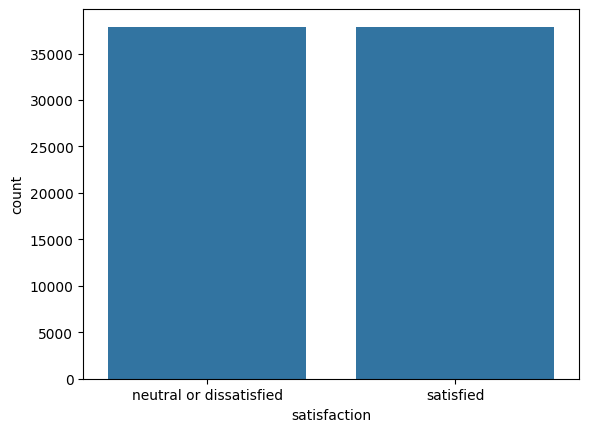

In [21]:
import seaborn as sns
sns.countplot(x="satisfaction", data=df_copy)

## Train-Test Splitting

In [22]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,1,25,235,1
1,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,26,1142,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,25,562,11
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,61,214,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,52,2035,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75775,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,1,26,1127,0
75776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,28,1532,0
75777,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,38,3496,3
75778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,31,1919,0


In [23]:
y = df_copy.iloc[:,-1]
y

0        neutral or dissatisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
75775    neutral or dissatisfied
75776    neutral or dissatisfied
75777    neutral or dissatisfied
75778    neutral or dissatisfied
75779    neutral or dissatisfied
Name: satisfaction, Length: 75780, dtype: object

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (53046, 77) and test set is :(22734, 77)


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[-0.17498508, -0.40604592, -0.49105237, ...,  0.01405142,
        -0.01520397, -0.53212404],
       [-0.17498508, -0.40604592,  2.03644268, ..., -0.90483687,
         0.72642375,  3.31612533],
       [-0.17498508,  2.46277561, -0.49105237, ..., -0.90483687,
         0.06365489, -0.53212404],
       ...,
       [-0.17498508,  2.46277561, -0.49105237, ..., -0.44539273,
         0.61655298,  1.32073677],
       [-0.17498508,  2.46277561, -0.49105237, ..., -1.36428102,
         0.81591527, -0.53212404],
       [-0.17498508, -0.40604592, -0.49105237, ..., -0.52196675,
        -0.64784698, -0.53212404]])

## Set paramiter CV

In [26]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier(criterion='gini', splitter='best',max_features=6,random_state=1234)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_dt.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_DT = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_DT:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.188769 วินาที


In [28]:

#Predict the accuracy of the model
y_pred_dt=model_dt.predict(X_test)

accuracy_DT=accuracy_score(y_pred_dt,y_test)
print(f"Accuracy of Decision Tree is : {round(accuracy_DT*100,2)} % .")

report=classification_report(y_test,y_pred_dt)
print("Classification Report is : \n",report)

Accuracy of Decision Tree is : 95.36 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.96      0.95     11333
              satisfied       0.96      0.95      0.95     11401

               accuracy                           0.95     22734
              macro avg       0.95      0.95      0.95     22734
           weighted avg       0.95      0.95      0.95     22734



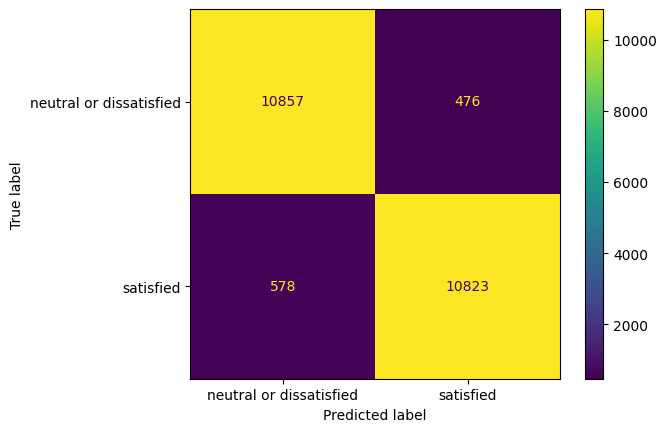

In [29]:
cm_2= confusion_matrix(y_test, y_pred_dt, labels=model_dt.classes_)
disp_2= ConfusionMatrixDisplay(confusion_matrix=cm_2,
                          display_labels=model_dt.classes_)
disp_2.plot()

In [30]:
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_dt = cross_val_score(model_dt, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (Decision Tree): {cv_scores_dt}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_dt):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_dt):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_DT = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_DT:.6f} วินาที")


Cross Validation Scores (Decision Tree): [0.94515126 0.94317218 0.94204128 0.94571671 0.94458581 0.95250212
 0.95673077 0.95277149 0.94315611 0.94994344 0.95871041 0.95559955
 0.94739819 0.95277149 0.94966063]
Mean CV Accuracy: 0.9493
Standard Deviation CV Accuracy: 0.0052
เวลาที่ใช้ในการทำ Cross Validation: 3.382362 วินาที


In [31]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_dt.predict(X_train))
test_accuracy = accuracy_score(y_test, model_dt.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 1.0
Test Accuracy: 0.9536377232339227


## Save Model Predic

In [32]:
import pickle
pickle_out = open("../../pipelines/model_DT_business.pkl", mode = "wb")
pickle.dump(model_dt, pickle_out)
pickle_out.close()

with open('../../pipelines/scaler_DT.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Load Model Predic

In [33]:
import pickle
df_t = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_sam = df_t.sample(20)
df_sam

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
74590,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,37,1107,0,neutral or dissatisfied
14346,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,45,3741,9,satisfied
43059,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,55,3934,0,satisfied
8818,0,0,0,1,0,0,0,0,0,1,...,1,1,0,1,0,1,57,3617,30,satisfied
55773,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,38,986,2,neutral or dissatisfied
48439,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,21,236,0,satisfied
69198,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,49,1126,0,neutral or dissatisfied
56895,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,59,2854,0,neutral or dissatisfied
41716,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,42,3169,0,satisfied
58058,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,45,1749,0,neutral or dissatisfied


In [34]:

X_sam= df_sam.iloc[:,:-1]
X_sam


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
74590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,37,1107,0
14346,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,45,3741,9
43059,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,55,3934,0
8818,0,0,0,1,0,0,0,0,0,1,...,0,1,1,0,1,0,1,57,3617,30
55773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,38,986,2
48439,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,1,21,236,0
69198,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,49,1126,0
56895,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,59,2854,0
41716,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,42,3169,0
58058,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,45,1749,0


In [35]:
y_sam = df_sam.iloc[:,-1]
y_sam


74590    neutral or dissatisfied
14346                  satisfied
43059                  satisfied
8818                   satisfied
55773    neutral or dissatisfied
48439                  satisfied
69198    neutral or dissatisfied
56895    neutral or dissatisfied
41716                  satisfied
58058    neutral or dissatisfied
71287    neutral or dissatisfied
63492    neutral or dissatisfied
35489                  satisfied
11235                  satisfied
45905    neutral or dissatisfied
68048    neutral or dissatisfied
20594                  satisfied
41479    neutral or dissatisfied
3859                   satisfied
53728    neutral or dissatisfied
Name: satisfaction, dtype: object

In [36]:
model = pickle.load(open("../../pipelines/model_DT_business.pkl", 'rb'))
scaler_DT = pickle.load(open("../../pipelines/scaler_DT.pkl", 'rb'))

scaler_new = scaler_DT.transform(X_sam)
preds = model.predict(scaler_new)
print(preds)
accuracy_DT=accuracy_score(preds,y_sam)
print(f"Accuracy of DT is : {round(accuracy_DT*100,2)} % .")

['neutral or dissatisfied' 'satisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied'
 'satisfied' 'neutral or dissatisfied' 'neutral or dissatisfied'
 'satisfied' 'neutral or dissatisfied' 'satisfied'
 'neutral or dissatisfied']
Accuracy of DT is : 100.0 % .
